# Load Packages and Dataset

In [ ]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # unzip raw data if necessary

# # This may take a while (1 min)
# !unzip Combined_Flights_2021.csv.zip

In [ ]:
# load raw data, and take a look at raw data

# This may take a while (2-3 min)
df_raw = pd.read_csv('Combined_Flights_2021.csv')
df_raw.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,724.0,813.0,5.0,843,-25.0,0.0,-2.0,0800-0859,2,0.0
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,940.0,1028.0,3.0,1040,-9.0,0.0,-1.0,1000-1059,2,0.0
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,1336.0,1445.0,16.0,1530,-29.0,0.0,-2.0,1500-1559,4,0.0
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,1703.0,1955.0,7.0,2010,-8.0,0.0,-1.0,2000-2059,4,0.0
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,1851.0,1900.0,3.0,1925,-22.0,0.0,-2.0,1900-1959,2,0.0


# Data Cleaning & Relevant Features Selection

In [ ]:
# get shape of raw data

df_raw.shape

(6311871, 61)

In [ ]:
# Check if data is concentrated around any specific time of year, month, week
# No, we are good!

# # we can drop year since all records are from 2021.
# df_raw.Year.value_counts()

# # we can keep Quarter - least flights in Q1.
# df_raw.Quarter.value_counts()

# # we can keep Month - least flights in Feb.
# df_raw.Month.value_counts().sort_index()

# # we can keep DayofMonth, if needed
# df_raw.DayofMonth.value_counts().sort_index()

# # we can keep DayOfWeek
df_raw.DayOfWeek.value_counts().sort_index()

1    939051
2    839768
3    859163
4    943687
5    953855
6    840721
7    935626
Name: DayOfWeek, dtype: int64

In [ ]:
# check what are the available columns in raw data

df_raw.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [ ]:
# select relevant columns from raw data, and save as new data frame

relevant_columns = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek'  # Feature Group 1 - Scheduled Flight Date
          , 'CRSDepTime', 'CRSArrTime'   # Feature Group 2 - Scheduled Flight Time
          ,'DOT_ID_Operating_Airline', 'Operating_Airline', 'Airline' # Feature Group 3 - Airline
          ,'Flight_Number_Operating_Airline', 'Tail_Number' # Feature Group 4 - Flight Number & Aircraft Number
          , 'OriginAirportID', 'Origin', 'OriginCityName', 'OriginStateName' # Feature Group 5 -  Origin Airport/Location
          , 'DestAirportID', 'Dest', 'DestCityName', 'DestStateName' # Feature Group 6 -  Destination Airport/Location
          , 'Distance', 'DistanceGroup' # Feature Group 7 - Distance
         # , 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay' # for convenience - Delay Reasons. !cannot find in 2021 data!
          , 'FlightDate' # For convenience
          , 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups'] # Target Variables: Arrival delays (for Continuous, Binary, and Categorical Prediction, respectively)

df_relevant = df_raw[relevant_columns]
df_relevant.shape

(6311871, 25)

In [ ]:
# check null values

df_relevant.isnull().sum().sort_values(ascending = False)

ArrivalDelayGroups                 126001
ArrDel15                           126001
ArrDelayMinutes                    126001
Tail_Number                         23303
OriginCityName                          0
FlightDate                              0
DistanceGroup                           0
Distance                                0
DestStateName                           0
DestCityName                            0
Dest                                    0
DestAirportID                           0
OriginStateName                         0
Quarter                                 0
Month                                   0
OriginAirportID                         0
Flight_Number_Operating_Airline         0
Airline                                 0
Operating_Airline                       0
DOT_ID_Operating_Airline                0
CRSArrTime                              0
CRSDepTime                              0
DayOfWeek                               0
DayofMonth                        

In [ ]:
# drop rows with NA values, and save as new df
df_relevant_nonull = df_relevant.dropna()

# check null values again
df_relevant_nonull.isnull().sum().sort_values(ascending = False)

Quarter                            0
OriginCityName                     0
ArrDel15                           0
ArrDelayMinutes                    0
FlightDate                         0
DistanceGroup                      0
Distance                           0
DestStateName                      0
DestCityName                       0
Dest                               0
DestAirportID                      0
OriginStateName                    0
Origin                             0
Month                              0
OriginAirportID                    0
Tail_Number                        0
Flight_Number_Operating_Airline    0
Airline                            0
Operating_Airline                  0
DOT_ID_Operating_Airline           0
CRSArrTime                         0
CRSDepTime                         0
DayOfWeek                          0
DayofMonth                         0
ArrivalDelayGroups                 0
dtype: int64

In [ ]:
# check data types

df_relevant_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6185870 entries, 0 to 6311870
Data columns (total 25 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Quarter                          int64  
 1   Month                            int64  
 2   DayofMonth                       int64  
 3   DayOfWeek                        int64  
 4   CRSDepTime                       int64  
 5   CRSArrTime                       int64  
 6   DOT_ID_Operating_Airline         int64  
 7   Operating_Airline                object 
 8   Airline                          object 
 9   Flight_Number_Operating_Airline  int64  
 10  Tail_Number                      object 
 11  OriginAirportID                  int64  
 12  Origin                           object 
 13  OriginCityName                   object 
 14  OriginStateName                  object 
 15  DestAirportID                    int64  
 16  Dest                             object 
 17  DestCity

In [ ]:
# extract CRSDepHour and CRSDepMin from CRSDepTime
df_relevant_nonull['CRSDepHour'] = df_relevant_nonull['CRSDepTime'] // 100 # get the hour
df_relevant_nonull['CRSDepMin'] = df_relevant_nonull['CRSDepTime'] % 100 # get the minute

# extract CRSArrHour and CRSArrMin from CRSArrTime
df_relevant_nonull['CRSArrHour'] = df_relevant_nonull['CRSArrTime'] // 100  # get the hour
df_relevant_nonull['CRSArrMin'] = df_relevant_nonull['CRSArrTime'] % 100  # get the minute

# convert flightDate to datetime
df_relevant_nonull['FlightDate'] = pd.to_datetime(df_relevant_nonull['FlightDate'])

# check again
df_relevant_nonull.info()

/var/folders/_r/8mtdk0yn33j77rj_0z8_f2c00000gn/T/ipykernel_2431/1179979494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant_nonull['CRSDepHour'] = df_relevant_nonull['CRSDepTime'] // 100 # get the hour
/var/folders/_r/8mtdk0yn33j77rj_0z8_f2c00000gn/T/ipykernel_2431/1179979494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant_nonull['CRSDepMin'] = df_relevant_nonull['CRSDepTime'] % 100 # get the minute
/var/folders/_r/8mtdk0yn33j77rj_0z8_f2c00000gn/T/ipykernel_2431/1179979494.py:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6185870 entries, 0 to 6311870
Data columns (total 29 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Quarter                          int64         
 1   Month                            int64         
 2   DayofMonth                       int64         
 3   DayOfWeek                        int64         
 4   CRSDepTime                       int64         
 5   CRSArrTime                       int64         
 6   DOT_ID_Operating_Airline         int64         
 7   Operating_Airline                object        
 8   Airline                          object        
 9   Flight_Number_Operating_Airline  int64         
 10  Tail_Number                      object        
 11  OriginAirportID                  int64         
 12  Origin                           object        
 13  OriginCityName                   object        
 14  OriginStateName                  o

/var/folders/_r/8mtdk0yn33j77rj_0z8_f2c00000gn/T/ipykernel_2431/1179979494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant_nonull['FlightDate'] = pd.to_datetime(df_relevant_nonull['FlightDate'])


In [ ]:
df_relevant_nonull.head(10)

,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DOT_ID_Operating_Airline,Operating_Airline,Airline,Flight_Number_Operating_Airline,...,Distance,DistanceGroup,FlightDate,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrMin
0,1,3,3,3,724,843,20304,OO,SkyWest Airlines Inc.,3133,...,262.0,2,2021-03-03,0.0,0.0,-2.0,7,24,8,43
1,1,3,3,3,922,1040,20304,OO,SkyWest Airlines Inc.,3134,...,262.0,2,2021-03-03,0.0,0.0,-1.0,9,22,10,40
2,1,3,3,3,1330,1530,20304,OO,SkyWest Airlines Inc.,3135,...,843.0,4,2021-03-03,0.0,0.0,-2.0,13,30,15,30
3,1,3,3,3,1645,2010,20304,OO,SkyWest Airlines Inc.,3136,...,868.0,4,2021-03-03,0.0,0.0,-1.0,16,45,20,10
4,1,3,3,3,1844,1925,20304,OO,SkyWest Airlines Inc.,3137,...,425.0,2,2021-03-03,0.0,0.0,-2.0,18,44,19,25
5,1,3,3,3,1650,1834,20304,OO,SkyWest Airlines Inc.,3139,...,409.0,2,2021-03-03,0.0,0.0,-2.0,16,50,18,34
6,1,3,3,3,1652,1902,20304,OO,SkyWest Airlines Inc.,3140,...,261.0,2,2021-03-03,27.0,1.0,1.0,16,52,19,2
7,1,3,3,3,1245,1456,20304,OO,SkyWest Airlines Inc.,3141,...,1022.0,5,2021-03-03,0.0,0.0,-1.0,12,45,14,56
8,1,3,3,3,726,836,20304,OO,SkyWest Airlines Inc.,3142,...,588.0,3,2021-03-03,0.0,0.0,-1.0,7,26,8,36
9,1,3,3,3,2045,2215,20304,OO,SkyWest Airlines Inc.,3144,...,674.0,3,2021-03-03,0.0,0.0,-2.0,20,45,22,15


In [ ]:
# check duplicates

# no absolute duplicates based on all relevant columns
df_relevant_nonull[df_relevant_nonull.duplicated()]

,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DOT_ID_Operating_Airline,Operating_Airline,Airline,Flight_Number_Operating_Airline,...,Distance,DistanceGroup,FlightDate,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrMin


In [ ]:
# check duplicates

# check if there are duplicates based on a combination of flight identifiers: Flight Date, Airline, Flight Number, Origin, and Destination

# no duplicates based on the set of flight identifiers
# duplicateRows_specific = df_relevant_nonull[df_relevant_nonull.duplicated(['FlightDate', 'Airline', 'Flight_Number_Operating_Airline', 'Origin', 'Dest'])]
duplicateRows_specific = df_relevant_nonull[df_relevant_nonull.duplicated(['FlightDate', 'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'DestAirportID'])]
duplicateRows_specific

,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DOT_ID_Operating_Airline,Operating_Airline,Airline,Flight_Number_Operating_Airline,...,Distance,DistanceGroup,FlightDate,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrMin


In [ ]:
df_relevant_nonull.shape

(6185870, 29)

# Exploratory Data Analysis

In [ ]:
df_relevant_nonull.head(1)

,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DOT_ID_Operating_Airline,Operating_Airline,Airline,Flight_Number_Operating_Airline,...,Distance,DistanceGroup,FlightDate,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrMin
0,1,3,3,3,724,843,20304,OO,SkyWest Airlines Inc.,3133,...,262.0,2,2021-03-03,0.0,0.0,-2.0,7,24,8,43


In [ ]:
# Get summary statistics
df_relevant_nonull.describe()

,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DOT_ID_Operating_Airline,Flight_Number_Operating_Airline,OriginAirportID,DestAirportID,Distance,DistanceGroup,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,CRSDepHour,CRSDepMin,CRSArrHour,CRSArrMin
count,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.185870e+06
mean,2.650939e+00,6.971771e+00,1.578911e+01,4.014697e+00,1.322929e+03,1.497352e+03,2.001231e+04,2.794050e+03,1.265947e+04,1.266003e+04,7.960703e+02,3.655958e+00,1.252928e+01,1.726611e-01,-3.158285e-01,1.296253e+01,2.667576e+01,1.467698e+01,2.965443e+01
std,1.076774e+00,3.298142e+00,8.786713e+00,2.003742e+00,4.739252e+02,4.943002e+02,3.769165e+02,1.827549e+03,1.533544e+03,1.533821e+03,5.843526e+02,2.285352e+00,4.674770e+01,3.779540e-01,2.266604e+00,4.712714e+00,1.817828e+01,4.941431e+00,1.747450e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,1.013500e+04,3.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,9.200000e+02,1.118000e+03,1.979000e+04,1.193000e+03,1.129200e+04,1.129200e+04,3.700000e+02,2.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,9.000000e+00,1.000000e+01,1.100000e+01,1.500000e+01
50%,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,1.315000e+03,1.520000e+03,1.997700e+04,2.445000e+03,1.288900e+04,1.288900e+04,6.460000e+02,3.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.300000e+01,2.800000e+01,1.500000e+01,3.000000e+01
75%,4.000000e+00,1.000000e+01,2.300000e+01,6.000000e+00,1.721000e+03,1.913000e+03,2.037800e+04,4.445000e+03,1.405700e+04,1.405700e+04,1.034000e+03,5.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,4.200000e+01,1.900000e+01,4.500000e+01
max,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,2.050000e+04,9.695000e+03,1.686900e+04,1.686900e+04,5.812000e+03,1.100000e+01,3.089000e+03,1.000000e+00,1.200000e+01,2.300000e+01,5.900000e+01,2.400000e+01,5.900000e+01


In [ ]:
# Check binary target

# We have class imbalance

df_relevant_nonull.ArrDel15.value_counts()

0.0    5117811
1.0    1068059
Name: ArrDel15, dtype: int64

In [ ]:
# Check categorical target

# Right skewed. Most flights don't delay too much

ArrivalDelayGroups_table = df_relevant_nonull.ArrivalDelayGroups.value_counts().sort_index()
ArrivalDelayGroups_table

-2.0     1583783
-1.0     2466704
 0.0     1067324
 1.0      401559
 2.0      199467
 3.0      119535
 4.0       79751
 5.0       56743
 6.0       42103
 7.0       31781
 8.0       24765
 9.0       19838
 10.0      15457
 11.0      12258
 12.0      64802
Name: ArrivalDelayGroups, dtype: int64

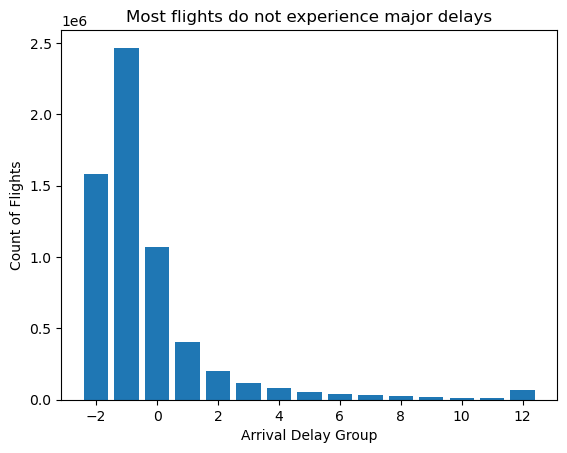

In [ ]:
# plot ArrivalDelayGroups distribution

plt.bar(ArrivalDelayGroups_table.index, ArrivalDelayGroups_table.values)
plt.title('Most flights do not experience major delays')
plt.xlabel('Arrival Delay Group')
plt.ylabel('Count of Flights')
plt.show()

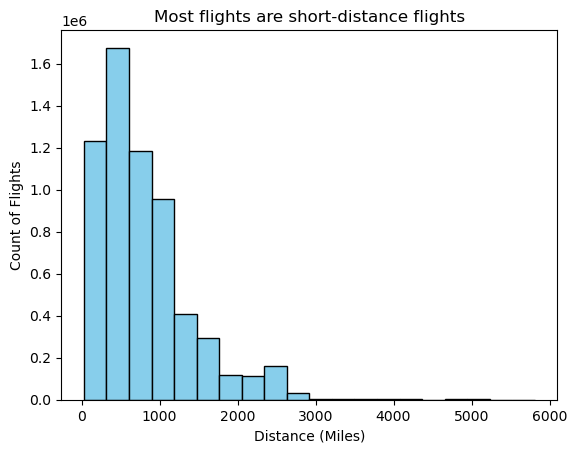

In [ ]:
# Check Distance

# Right skewed

# Consider removing outliers

plt.hist(df_relevant_nonull.Distance, bins=20, color='skyblue', edgecolor='black')
plt.title('Most flights are short-distance flights')
plt.xlabel('Distance (Miles)')
plt.ylabel('Count of Flights')
plt.show()

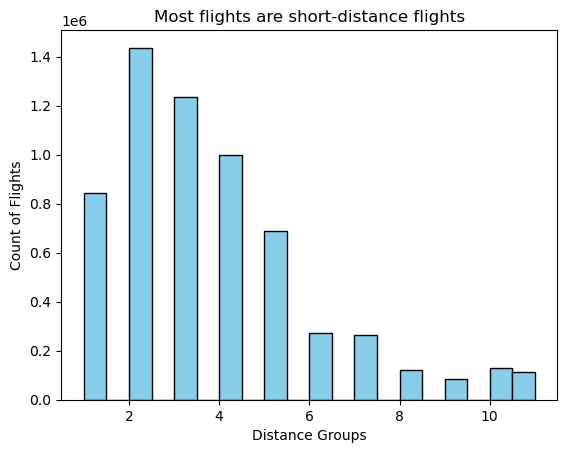

In [ ]:
# Check Distance Groups

# Right skewed as well

plt.hist(df_relevant_nonull.DistanceGroup, bins=20, color='skyblue', edgecolor='black')
plt.title('Most flights are short-distance flights')
plt.xlabel('Distance Groups')
plt.ylabel('Count of Flights')
plt.show()

In [ ]:
df_relevant_nonull.DistanceGroup.value_counts().sort_index()

1      842715
2     1436681
3     1235415
4      997304
5      688354
6      273171
7      263058
8      119651
9       84549
10     131303
11     113669
Name: DistanceGroup, dtype: int64

In [ ]:
# Flights per month

flights_per_month_table = df_relevant_nonull.Month.value_counts().sort_index()
flights_per_month_table

1     374609
2     329273
3     460415
4     470609
5     516390
6     562669
7     603149
8     590586
9     559156
10    581633
11    572369
12    565012
Name: Month, dtype: int64

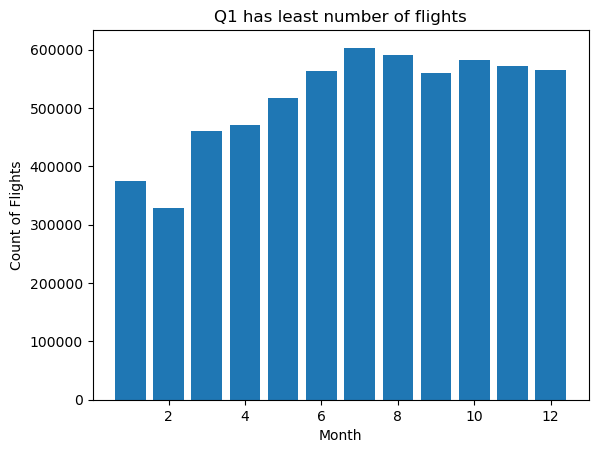

In [ ]:
# Plot number of flights by Month

plt.bar(flights_per_month_table.index, flights_per_month_table.values)
plt.title('Q1 has least number of flights')
plt.xlabel('Month')
plt.ylabel('Count of Flights')
plt.show()

In [ ]:
# Flights per DayOfWeek

flights_per_dow_table = df_relevant_nonull.DayOfWeek.value_counts().sort_index()
flights_per_dow_table

1    915543
2    823423
3    844380
4    925896
5    937716
6    825681
7    913231
Name: DayOfWeek, dtype: int64

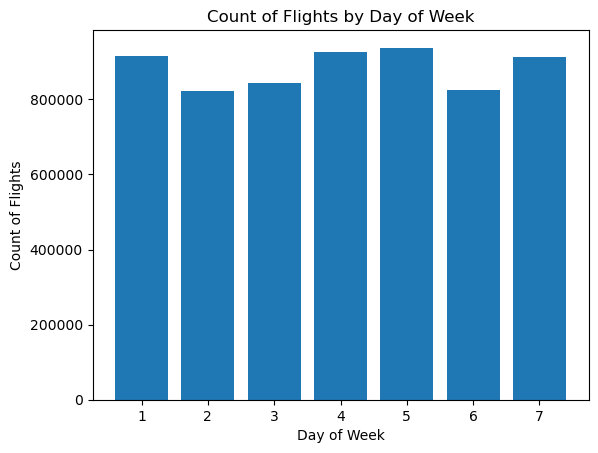

In [ ]:
# Plot number of flights by DayOfWeek

plt.bar(flights_per_dow_table.index, flights_per_dow_table.values)
plt.title('Count of Flights by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Flights')
plt.show()

In [ ]:
# Get count of unique values for each non-numerical variable
df_relevant_nonull_non_numerical = df_relevant_nonull.select_dtypes(include='object')
df_relevant_nonull_non_numerical_table = pd.DataFrame({'variable_name': df_relevant_nonull_non_numerical.columns})
df_relevant_nonull_non_numerical_table['unique_value_count'] = 0
df_relevant_nonull_non_numerical_table = df_relevant_nonull_non_numerical_table.set_index('variable_name')
df_relevant_nonull_non_numerical_table

,unique_value_count
variable_name,
Operating_Airline,0
Airline,0
Tail_Number,0
Origin,0
OriginCityName,0
OriginStateName,0
Dest,0
DestCityName,0
DestStateName,0


In [ ]:
# Airline has 22 unique values, which is feasible for One-Hot encoding.
# Other ones have a diverse set of unique values. Best to use proxy variables if we choose thsoe features

for col in df_relevant_nonull_non_numerical.columns:
    df_relevant_nonull_non_numerical_table.loc[col, 'unique_value_count'] = len(df_relevant_nonull_non_numerical[col].unique())

df_relevant_nonull_non_numerical_table = df_relevant_nonull_non_numerical_table.sort_values(by='unique_value_count')
df_relevant_nonull_non_numerical_table

,unique_value_count
variable_name,
Operating_Airline,22
Airline,22
OriginStateName,53
DestStateName,53
OriginCityName,374
DestCityName,374
Origin,380
Dest,380
Tail_Number,5758


In [ ]:
# delay by DayOfWeek

delays_by_dayofweek = pd.DataFrame({'delay_count': df_relevant_nonull.groupby('DayOfWeek')['ArrDel15'].sum()})
flights_by_dayofweek = pd.DataFrame({'flight_count': df_relevant_nonull.groupby('DayOfWeek').size()})
delays_by_dayofweek = delays_by_dayofweek.merge(flights_by_dayofweek, on='DayOfWeek', how='inner')
delays_by_dayofweek['delay_rate'] = delays_by_dayofweek['delay_count'] / delays_by_dayofweek['flight_count']
delays_by_dayofweek = delays_by_dayofweek.sort_values(by='delay_rate', ascending=False)
delays_by_dayofweek

,delay_count,flight_count,delay_rate
DayOfWeek,,,
7,169641.0,913231,0.185759
1,166512.0,915543,0.181872
5,169011.0,937716,0.180237
4,165940.0,925896,0.179221
6,140663.0,825681,0.170360
3,129840.0,844380,0.153770
2,126452.0,823423,0.153569


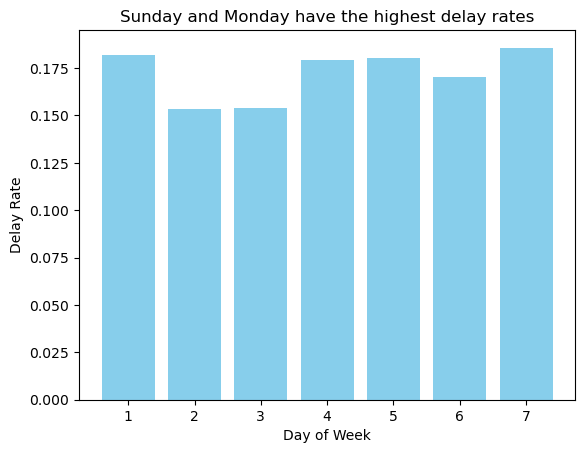

In [ ]:
# Plot delay by DayOfWeek

plt.bar(delays_by_dayofweek.index, delays_by_dayofweek['delay_rate'], color='skyblue')

plt.title('Sunday and Monday have the highest delay rates')
plt.xlabel('Day of Week')
plt.ylabel('Delay Rate')
plt.show()

In [ ]:
# delay by Month

delays_by_month = pd.DataFrame({'delay_count': df_relevant_nonull.groupby('Month')['ArrDel15'].sum()})
flights_by_month = pd.DataFrame({'flight_count': df_relevant_nonull.groupby('Month').size()})
delays_by_month = delays_by_month.merge(flights_by_month, on='Month', how='inner')
delays_by_month['delay_rate'] = delays_by_month['delay_count'] / delays_by_month['flight_count']
delays_by_month = delays_by_month.sort_values(by='delay_rate', ascending=False)
delays_by_month

,delay_count,flight_count,delay_rate
Month,,,
7,151268.0,603149,0.250797
6,134685.0,562669,0.239368
8,136036.0,590586,0.230341
12,124252.0,565012,0.219910
10,105648.0,581633,0.181640
11,86010.0,572369,0.150270
2,48833.0,329273,0.148306
9,78984.0,559156,0.141256
5,68339.0,516390,0.132340


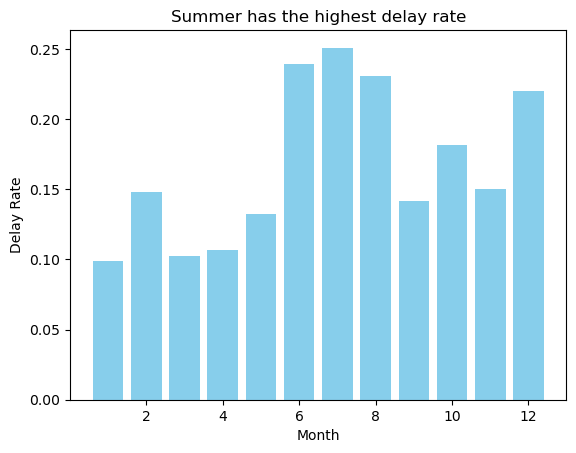

In [ ]:
# plot delay by Month

plt.bar(delays_by_month.index, delays_by_month['delay_rate'], color='skyblue')

plt.title('Summer has the highest delay rate')
plt.xlabel('Month')
plt.ylabel('Delay Rate')
plt.show()

In [ ]:
# delay by CRSDepHour

delays_by_depHour = pd.DataFrame({'delay_count': df_relevant_nonull.groupby('CRSDepHour')['ArrDel15'].sum()})
flights_by_depHour = pd.DataFrame({'flight_count': df_relevant_nonull.groupby('CRSDepHour').size()})
delays_by_depHour = delays_by_depHour.merge(flights_by_depHour, on='CRSDepHour', how='inner')
delays_by_depHour['delay_rate'] = delays_by_depHour['delay_count'] / delays_by_depHour['flight_count']
delays_by_depHour = delays_by_depHour.sort_values(by='delay_rate', ascending=False)
delays_by_depHour

,delay_count,flight_count,delay_rate
CRSDepHour,,,
19,79680.0,317052,0.251315
3,249.0,992,0.251008
2,385.0,1547,0.248869
21,44846.0,181164,0.247544
20,61878.0,261933,0.236236
18,88202.0,383310,0.230106
17,86936.0,387011,0.224634
16,79769.0,362449,0.220083
15,78624.0,380348,0.206716


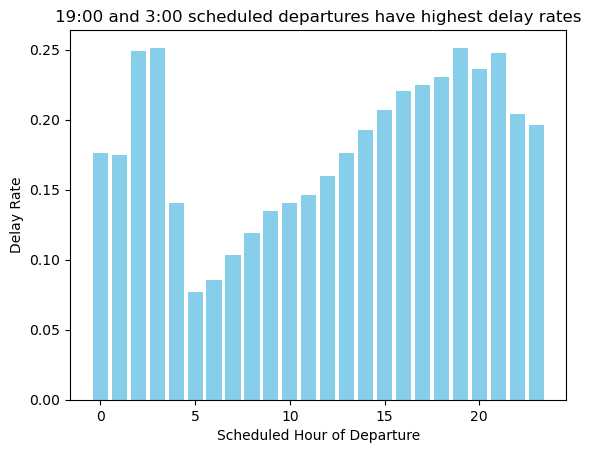

In [ ]:
# Plot delay by CRSDepHour

plt.bar(delays_by_depHour.index, delays_by_depHour['delay_rate'], color='skyblue')

plt.title('19:00 and 3:00 scheduled departures have highest delay rates')
plt.xlabel('Scheduled Hour of Departure')
plt.ylabel('Delay Rate')
plt.show()

In [ ]:
# delay by OriginCityName

delays_by_originCity = pd.DataFrame({'delay_count': df_relevant_nonull.groupby('OriginCityName')['ArrDel15'].sum()})
flights_by_originCity = pd.DataFrame({'flight_count': df_relevant_nonull.groupby('OriginCityName').size()})
delays_by_originCity = delays_by_originCity.merge(flights_by_originCity, on='OriginCityName', how='inner')
delays_by_originCity['delay_rate'] = delays_by_originCity['delay_count'] / delays_by_originCity['flight_count']
delays_by_originCity = delays_by_originCity.sort_values(by='delay_rate', ascending=False)
delays_by_originCity

,delay_count,flight_count,delay_rate
OriginCityName,,,
"Pago Pago, TT",6.0,6,1.000000
"Adak Island, AK",50.0,94,0.531915
"Bishop, CA",16.0,35,0.457143
"Ogden, UT",36.0,97,0.371134
"Hagerstown, MD",65.0,178,0.365169
...,...,...,...
"Dothan, AL",73.0,1058,0.068998
"Hilo, HI",337.0,4980,0.067671
"Cedar City, UT",42.0,621,0.067633


In [ ]:
# delay rate per airline

delays_by_airline = pd.DataFrame({'delay_count': df_relevant_nonull.groupby('Airline')['ArrDel15'].sum()})
flights_by_airline = pd.DataFrame({'flight_count': df_relevant_nonull.groupby('Airline').size()})
delays_by_airline = delays_by_airline.merge(flights_by_airline, on='Airline', how='inner')
delays_by_airline['delay_rate'] = delays_by_airline['delay_count'] / delays_by_airline['flight_count']
delays_by_airline = delays_by_airline.sort_values(by='delay_rate', ascending=False)
delays_by_airline

,delay_count,flight_count,delay_rate
Airline,,,
Allegiant Air,32707.0,111802,0.292544
JetBlue Airways,52009.0,198581,0.261903
"Commutair Aka Champlain Enterprises, Inc.",18347.0,73893,0.248291
Southwest Airlines Co.,231992.0,1038760,0.223336
Frontier Airlines Inc.,29933.0,135032,0.221673
Spirit Air Lines,38440.0,185286,0.207463
Mesa Airlines Inc.,31256.0,154555,0.202232
"GoJet Airlines, LLC d/b/a United Express",11223.0,57875,0.193918
Air Wisconsin Airlines Corp,14964.0,77715,0.192550


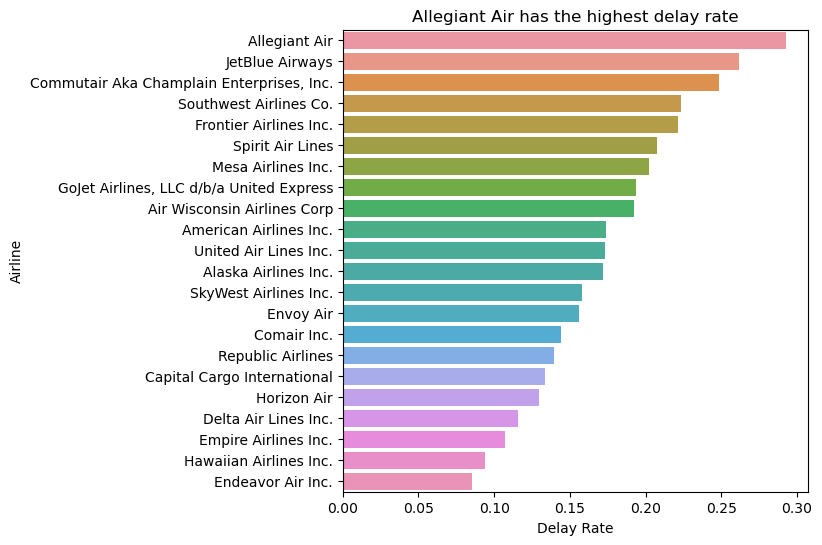

In [ ]:
# Plot delay rate per airline

plt.figure(figsize=(6, 6))
sns.barplot(data=delays_by_airline, x = 'delay_rate', y=delays_by_airline.index)

plt.title('Allegiant Air has the highest delay rate')
plt.xlabel('Delay Rate')
plt.ylabel('Airline')
plt.show()

In [ ]:
# select numerical variables to calculate correlation
df_relevant_nonull_numerical = df_relevant_nonull.select_dtypes(include='number')
df_relevant_nonull_numerical.shape

(6185870, 19)

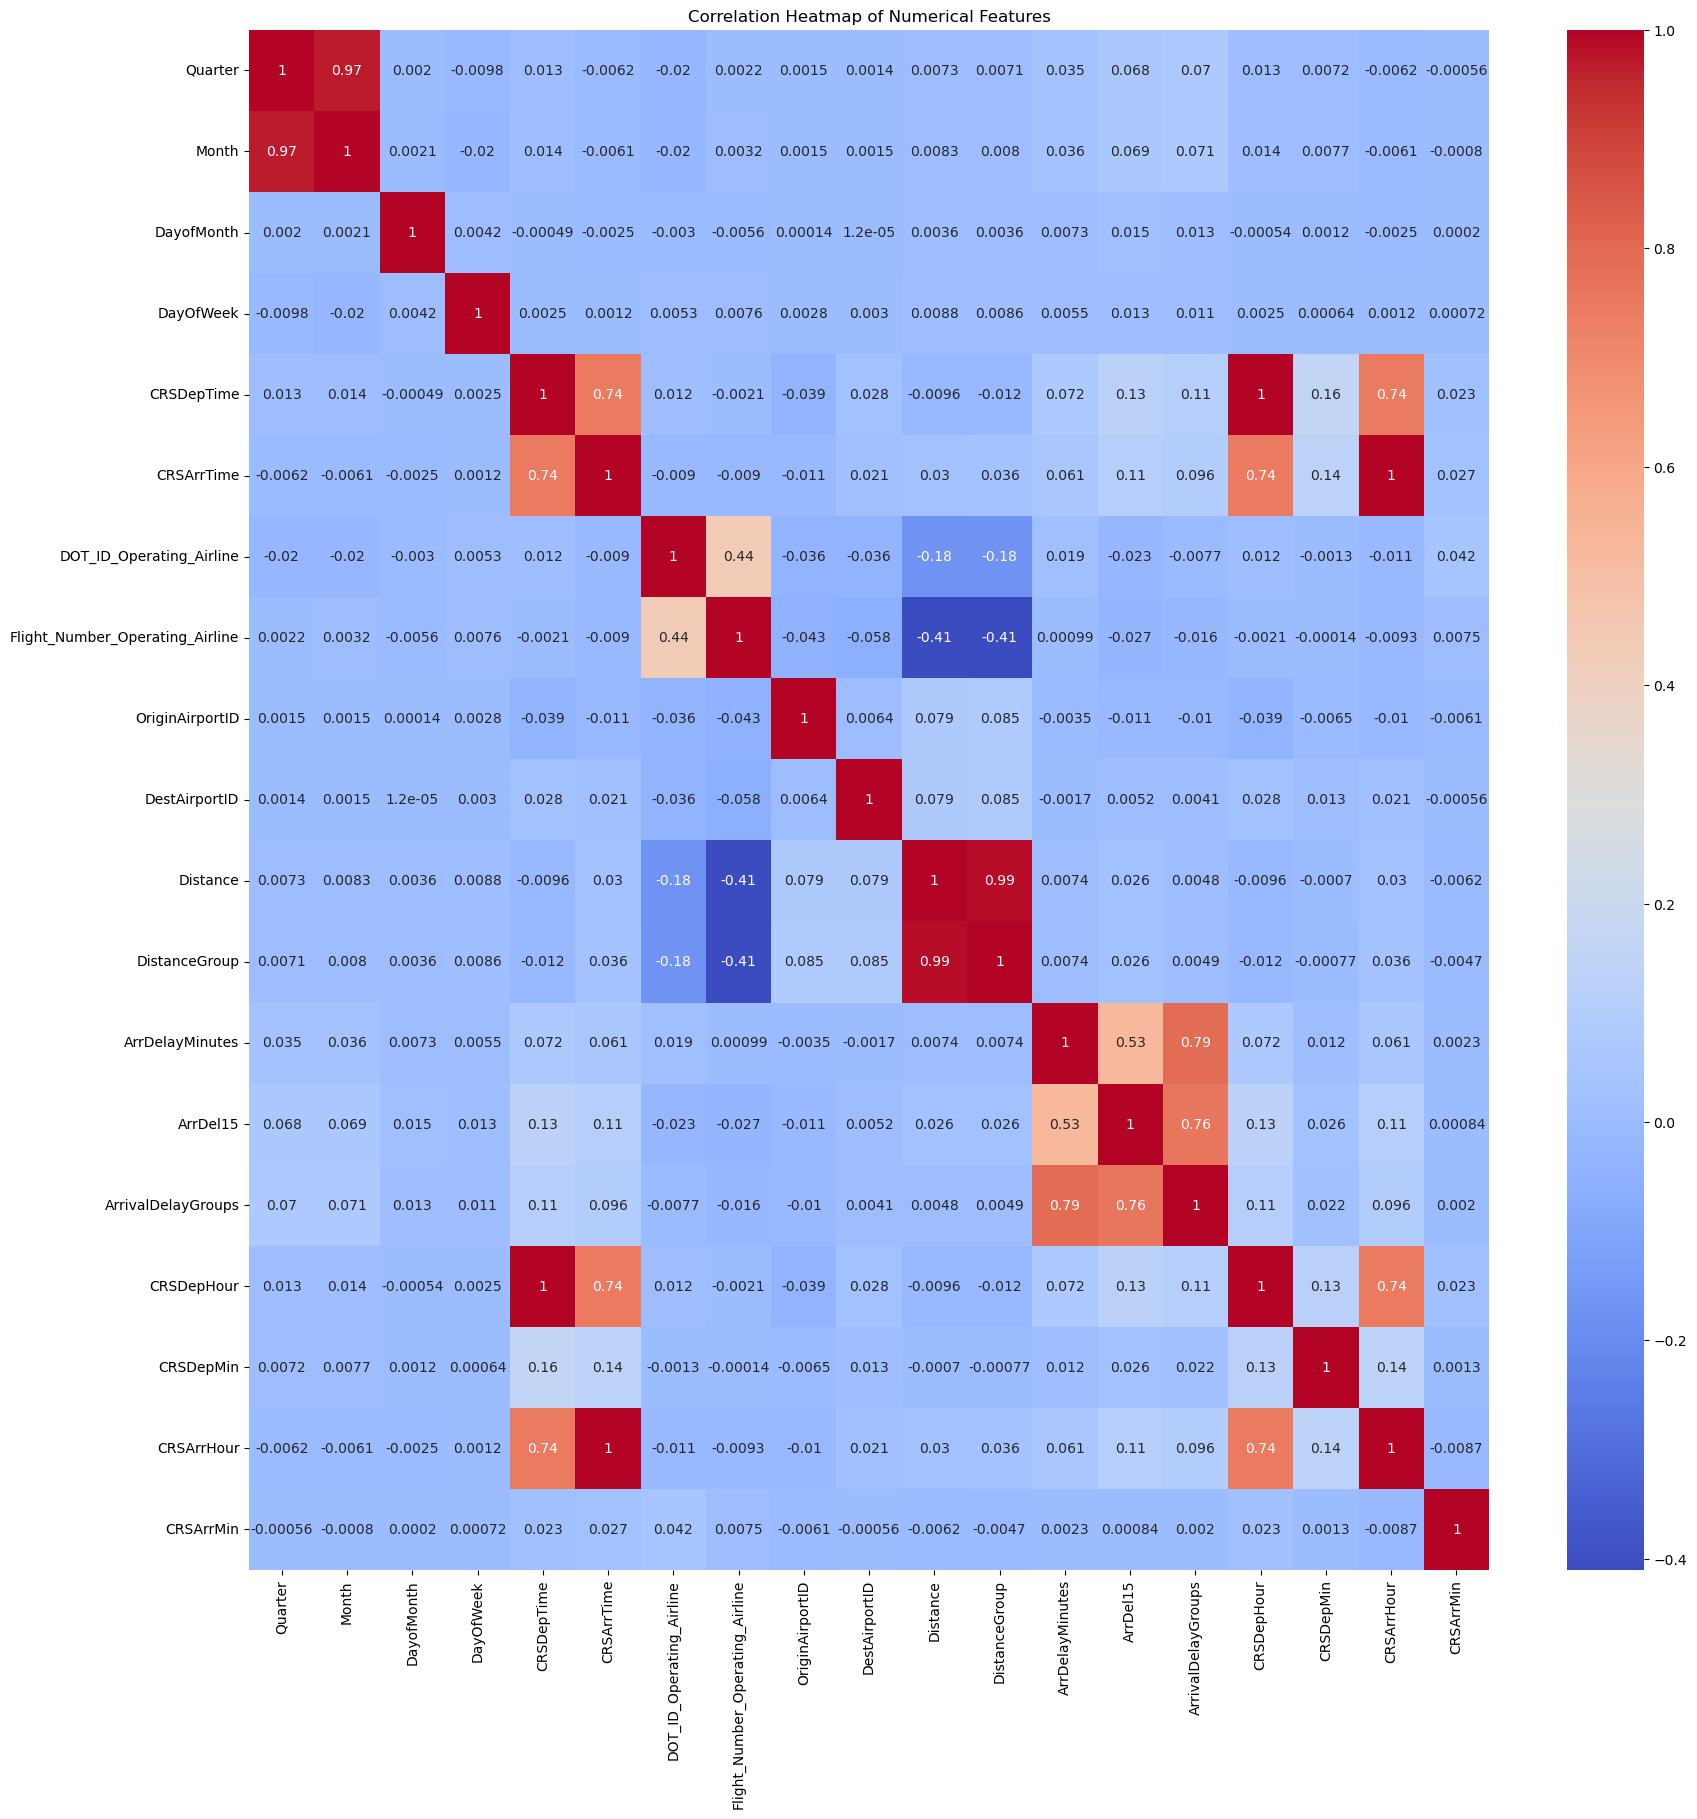

In [ ]:
# check correlation
correlation_matrix_scores = df_relevant_nonull_numerical.corr()

# Plot heatmap of correlations
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_scores, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Recommendations & Guidelines

When selecting the following features, select only 1 feature in each group due to correlation (or because they basically mean the same thing):  

1. Quarter & Month
2. CRSDepTime, CRSArrTime, CRSDepHour, CRSArrHour
3. DOT_ID_Operating_Airline, Operating_Airline, Airline
4. OriginAirportID, Origin, OriginCityName
5. DestAirportID, Dest, DestCityName
6. Distance & DistanceGroup


When selecting a target variable, select 1 based on your type of prediction:

1. Continuous Prediction: ArrDelayMinutes
2. Binary Prediction: ArrDel15
3. Categorical Prediction: ArrivalDelayGroups

In [ ]:
df_relevant_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6185870 entries, 0 to 6311870
Data columns (total 29 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Quarter                          int64         
 1   Month                            int64         
 2   DayofMonth                       int64         
 3   DayOfWeek                        int64         
 4   CRSDepTime                       int64         
 5   CRSArrTime                       int64         
 6   DOT_ID_Operating_Airline         int64         
 7   Operating_Airline                object        
 8   Airline                          object        
 9   Flight_Number_Operating_Airline  int64         
 10  Tail_Number                      object        
 11  OriginAirportID                  int64         
 12  Origin                           object        
 13  OriginCityName                   object        
 14  OriginStateName                  o

In [ ]:
df_relevant_nonull.shape

(6185870, 29)

In [ ]:
# This may take a while. (2-3 minutes)
df_relevant_nonull.to_csv('Cleaned_Combined_Flights_2021.csv')